# PRELECTURE

## Question 1: Simple Linear Regression 

Simple linear regression is a statistical method to help model and graph the relationship between a predicator and outcome variable, independent and dependent variables. The model assumes the Y is linearly dependent on x with some added random variablility, represented by an error term epsilon. 

The equation is  $$\ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

- x is the independent variable that is used to predict the changes in Y, can be any set of fixed values
- Intercept $\beta_0$ represents the value of Y when x = 0. The baseline level of Y, the intercept
- Slope $\beta_0$ is the rate of change in Y for each x, the slope, rise/run
- Error term $\epsilon$ introduces randomness, account for variability or influences on Y that are not captured by x. $\epsilon$ is normally distributed with mean 0 and a std of $\sigma$, thus giving the error "eqaution" above


To form a sample of n values:

1. We start by choosing values of x and setting values for $\beta_0, \beta_1$, and $\sigma$.
2. We then generate error terms $\epsilon$ from a normal distribution with mean 0 and standard deviation $\sigma$.
3. Finally, we calculate Y by combining these components according to the equation $ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$, yielding a sample of Y values around the line defined by $\beta_0$, + $\beta_1* x$

This combination means that the outcome variable Y is "centered" around a theoretical line, with individual points scattered around it according to the normal distribution of $\epsilon$. The resulting sample of n values exhibits both the linear trend described by x and variability described by $\sigma$. This setup provides a way to visualize Y as normally distributed around each corresponding x-value along the line.

### Code Example:

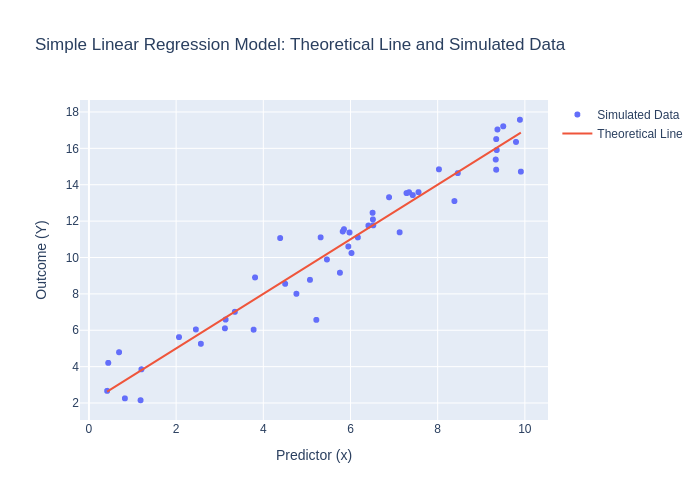

In [9]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# Define parameters
n = 50  # Number of samples
beta0 = 2.0  # Intercept
beta1 = 1.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate predictor values (x) from a uniform distribution
x = np.random.uniform(0, 10, n)

# Generate errors (epsilon) from a normal distribution
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Compute outcome values (Y) using the theoretical model
Y = beta0 + beta1 * x + errors

# Visualize the theoretical line and the simulated data points
fig = go.Figure()

# Add data points with simulated noise
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))

# Add the theoretical regression line (without fitting)
theoretical_Y = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=theoretical_Y, mode='lines', name='Theoretical Line'))

fig.update_layout(title="Simple Linear Regression Model: Theoretical Line and Simulated Data",
                  xaxis_title="Predictor (x)",
                  yaxis_title="Outcome (Y)")
fig.show(renderer='png')


## Question 2: Fitted SImple Linear Regression Model

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1326.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.27e-36
Time:                        03:33:46   Log-Likelihood:                -59.302
No. Observations:                  50   AIC:                             122.6
Df Residuals:                      48   BIC:                             126.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2675      0.237      9.573      0.0

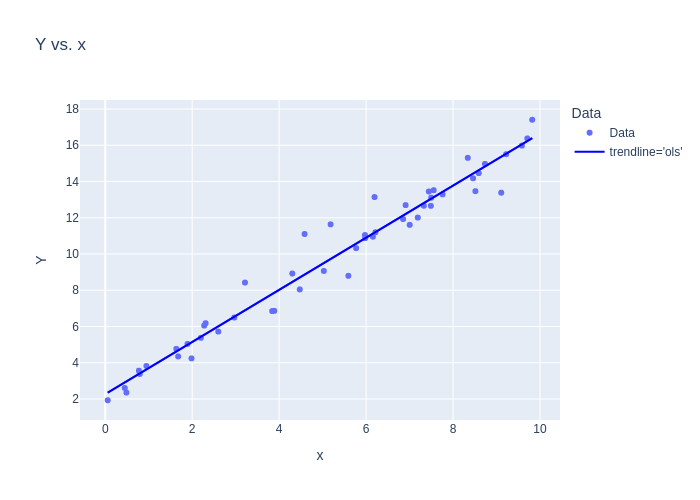

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  # Used for specifying and fitting statistical models

# Define parameters for the simulation
n = 50  # Number of samples
beta0 = 2.0  # Intercept
beta1 = 1.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate predictor values (x) from a uniform distribution and errors (epsilon) from a normal distribution
x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)
# Compute outcome values (Y) using the theoretical model with added noise
Y = beta0 + beta1 * x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit the Ordinary Least Squares (OLS) regression model
# "Y ~ x" specifies that Y is the outcome variable and x is the predictor variable
model_data_specification = smf.ols("Y ~ x", data=df)  
fitted_model = model_data_specification.fit()  # Fits the model to the data

# Displaying model outputs
# fitted_model.summary() provides a comprehensive summary including coefficients, R-squared, and diagnostics
# fitted_model.summary().tables[1] provides a concise table with estimated slope, intercept, standard errors, t-values, and p-values
# fitted_model.params shows the estimated intercept and slope values
# fitted_model.rsquared gives the R-squared value, measuring model fit
print(fitted_model.summary())
print(fitted_model.summary().tables[1])
print(fitted_model.params)
print(fitted_model.rsquared)

# Add a column to identify data points in the legend
# This allows the points to appear separately in the legend from the fitted line
df['Data'] = 'Data'  

# Plot the data points and fitted trendline using plotly.express
# trendline='ols' adds an OLS trendline automatically based on the data in df
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted line from statsmodels explicitly
# fig.add_scatter adds our own fitted line based on the statsmodels fit, useful for custom lines
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Render the figure as PNG for consistent display format
fig.show(renderer="png")


## Question 3: Combined Code

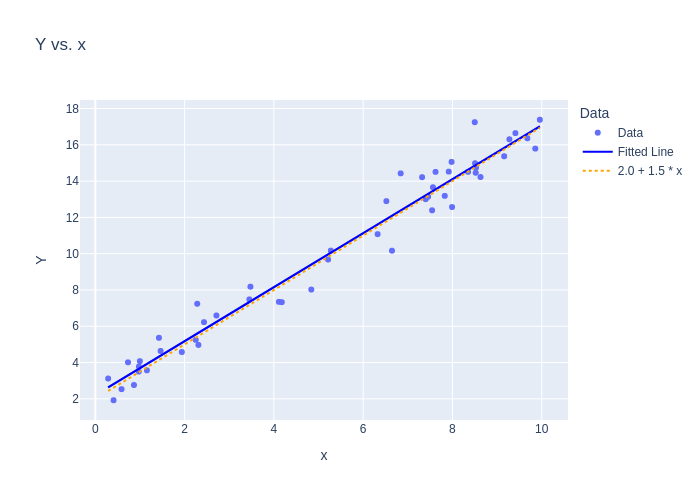

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Define parameters for the simulation
n = 50  # Number of samples
beta0 = 2.0  # Intercept of theoretical model
beta1 = 1.5  # Slope of theoretical model
sigma = 1.0  # Standard deviation of the error term

# Generate predictor values and errors
x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)
# Compute outcome values (Y) using the theoretical model
Y = beta0 + beta1 * x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit the Ordinary Least Squares (OLS) model
model_data_specification = smf.ols("Y ~ x", data=df)  
fitted_model = model_data_specification.fit()  # Fits the model to the data

# Add a column to identify data points in the legend
df['Data'] = 'Data'

# Plot the data points and fitted trendline using plotly.express
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted line from statsmodels explicitly
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="Fitted Line")

# Add the original theoretical line from Question 1
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=str(beta0)+' + '+str(beta1)+' * x', line=dict(dash='dot', color='orange'))

# Render the figure as PNG
fig.show(renderer="png")


## Question 4: fitted_model.fittedvalues

In practice we don't know the true value of $\beta_0$ and $\beta_1$, so we estimate using data. Obtaining estimates $\hat \beta_0$ and $\hat \beta_1$. The fitted/estimated regression line is $\hat Y_i = \hat \beta_0 + \hat \beta_1 * x_i$ and so $\hat Y_i$ is the predicted value of $Y_i$

fitted_model.fittedvalue uses Ordinary Least Squares in statsmodels to estimate $\beta_0$ and $\beta_1$ by by minimizing the sum of squared differences between observed $Y_i$ values and predicted $\hat Y_i$ values. These estimated parameters are stored in fitted_model.params or fitted_model.params.values. After it calculates the predicted $\hat Y_i$. This is why it represents the "in sampel predictions" of the outcome variable Y based on the estimated regression line



## Question 5: Line Chosen for Fitted Model
In Simple Linear Regression, the line chosen for the fitted model using the "ordinary least squares" (OLS) method is the one that minimizes the sum of the squared residuals. Residuals are the vertical distances between the observed data points and the fitted line, representing the differences between actual and predicted values.
Why "Squares" Are Used

The OLS method squares each residual to ensure all deviations contribute positively to the total error. This prevents positive and negative residuals from canceling each other out, and it gives larger penalties to larger deviations, making the method more sensitive to significant errors. Squaring the residuals emphasizes the goal of finding a line that minimizes overall deviations and thus provides the best fit to the observed data.
Visualization Explanation

In the provided visualization:

   - Blue Line (Fitted Line): This is the line chosen by OLS based on the observed data, minimizing the sum of squared residuals.
   - Orange Line (Theoretical Line): Represents the true relationship used to generate the data, which may differ due to random sampling variation.
  -  Red Dashed Lines (Residuals): Show the residuals between each observed YY and its corresponding fitted value on the blue line.
  -  Black Dashed Line (Mean of Y): Represents the average Y value, providing a reference to gauge the data's spread.

This visualization highlights how the OLS method uses residuals to determine the line that best fits the data, emphasizing that the fitted line is specifically chosen to minimize these squared deviations from observed points.

## Question 6: Proportion of Variation in Y

### First Expression:
1−((Y−fitted_model.fittedvalues)**2).sum()/((Y−Y.mean())**2).sum()


This expression calculates $R^2$, or the coefficient of determination, which measures the proportion of the total variation in Y that is explained by the fitted values $\hat Y$ from the model. Specifically:

   - The numerator ((Y−fitted_model.fittedvalues)**2).sum() represents the sum of squared residuals (SSR), the variation in Y not explained by the model.
   - The denominator ((Y−Y.mean())**2).sum() represents the total sum of squares (TSS), the total variation in YY around its mean.

Subtracting the ratio from 1 yields $R^2$, which is the proportion of the total variation in 
$Y$ that is explained by the fitted values from the model.

### 2:
fitted_model.rsquared:This is simply statsmodels’ built-in calculation of $R^2$, which provides the same result as the first expression. It’s a measure of how well the model explains the variance in $Y$ based on the predictors.

### 3: 
np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2: This expression calculates the square of the correlation coefficient between $Y$ and the fitted values $\hat Y$.
In the context of Simple Linear Regression, the square of the correlation coefficient corr $(Y,\hat Y)^2$ is equivalent to $R^2$. It measures the strength of the linear relationship between $Y$ and $\hat Y$.

### 4:
np.corrcoef(Y, x)[0,1]**2: This calculates the square of the correlation coefficient between $Y$ and the predictor $x$. While this isn't exactly the same as $R^2$, it provides insight into how strongly $Y$ and $x$ are linearly related. In the context of simple linear regression, this value will be close to $R^2$ because there’s only one predictor, but it won't include the effect of the fitted model specifically.




In a Simple Linear Regression model:

   - $R^2#$ is a measure of the accuracy of the model, quantifying the proportion of the variation in $Y$ that can be explained by the fitted model.
   - The expressions using the correlation coefficient squared provide alternative ways to calculate $R^2$, reflecting the linear relationship strength between $Y$ and $\hat Y$ or between $Y$ and $x$.

## Question 7: Assumptions of Simple Linear Regression

The Simple Linear Regression model relies on several assumptions, two of which do not appear compatible with this example data.

### Assumptions of Simple Linear Regression
1. **Linearity**: The relationship between the predictor $x$ (Amount of Fertilizer) and the outcome $Y$ (Crop Yield) should be approximately linear. This means that as $x$ changes, $Y$ should change in a roughly consistent linear pattern. 

2. **Normality of Residuals**: The residuals (differences between observed and predicted $Y$) should be normally distributed. This assumption is often checked using a histogram of residuals or other normality tests.

3. **Homoscedasticity (Constant Variance)**: The variance of the residuals should remain constant across all levels of $x$. In other words, the spread of residuals should not systematically increase or decrease with $x$.

4. **Independence of Observations**: Each observation should be independent of others, meaning that the predictor values and their associated outcomes should not influence each other.

### Incompatibilities with This Data

1. **Nonlinearity**: The scatter plot suggests a **nonlinear relationship** between the amount of fertilizer and crop yield. Crop yield does not increase in a simple linear pattern as fertilizer increases; instead, there appears to be a curve or upward trend that becomes more pronounced at higher levels of fertilizer. This violates the linearity assumption, which is essential for the Simple Linear Regression model.

2. **Non-Normal Residuals**: The histogram of residuals shows that the residuals are likely **not normally distributed**. Instead of clustering around zero in a symmetric, bell-shaped pattern, the residuals may be skewed, which suggests that the model's predictions do not equally underestimate and overestimate across all values of $x$.


Here’s a summary of our exchanges for your homework record:

---

### Summary of Chat Exchanges

1. **Simple Linear Regression Model Explanation (Question 1)**:
   - We discussed the theoretical Simple Linear Regression model, describing its components: predictor \( x \), outcome \( Y \), intercept \( \beta_0 \), slope \( \beta_1 \), and error term \( \epsilon \). We used Python code with `numpy` and `plotly` to visualize simulated data and the theoretical line without fitting the model.

2. **Fitting the Simple Linear Regression Model (Question 2)**:
   - We combined simulated data from the theoretical model into a pandas DataFrame and demonstrated how to fit a Simple Linear Regression model using `statsmodels.formula.api` with Ordinary Least Squares (OLS). We visualized both the simulated data and the fitted regression line using `plotly.express`. We explained each step, including the purpose of using `trendline='ols'` in Plotly for quick model fitting.

3. **Adding the Theoretical Line to the Fitted Model Plot (Question 3)**:
   - We added the original theoretical line from Question 1 to the fitted model plot. This helped illustrate the distinction between the theoretical line (based on true parameters) and the fitted line (estimated based on sampled data). We discussed how random sampling variation causes the fitted line to deviate from the theoretical line.

4. **Explanation of Fitted Values Calculation (Question 4)**:
   - We explained how `fitted_model.fittedvalues` are derived in `statsmodels`. The fitted values \(\hat{Y}_i\) are calculated using the estimated parameters \(\hat{\beta}_0\) and \(\hat{\beta}_1\), representing in-sample predictions of \( Y \) based on observed data.

5. **Ordinary Least Squares and Residuals (Question 5)**:
   - We discussed how the OLS method chooses a line that minimizes the sum of squared residuals, where residuals are the differences between observed \( Y \) values and their predicted values on the fitted line. Squaring residuals ensures all deviations contribute positively, making the method sensitive to larger errors.

6. **Understanding \( R^2 \) and Model Fit (Question 6)**:
   - We broke down multiple expressions used to calculate \( R^2 \), explaining that it represents the proportion of variation in \( Y \) explained by the model. We discussed how `fitted_model.rsquared`, the first expression, and the squared correlation coefficient between \( Y \) and \(\hat{Y}\) all measure \( R^2 \), while the correlation between \( Y \) and \( x \) gives a related but slightly different measure.

7. **Assumptions of Simple Linear Regression and Incompatibility with Example Data (Question 7)**:
   - We identified key assumptions of the Simple Linear Regression model: linearity, normality of residuals, homoscedasticity, and independence of observations. We observed that the example data violates linearity (suggesting a nonlinear relationship between fertilizer and crop yield) and normality of residuals (residuals are skewed). We noted that a more complex model, such as polynomial regression, might better capture the relationship.

---

This summary captures our main discussion points and the code-based exercises, along with explanations for each concept. Let me know if you need further adjustments or additional details!

unable to share link due to images

# POST LECTURE

## Question 8: Null Hypothesis

**$H_0$: There is no linear association (on average) between waiting time ($\text{waiting}$) and eruption duration ($\text{duration}$).**
- This hypothesis translates to: the slope of the regression line is zero, or $\beta_1 = 0$.

The alternative hypothesis ($H_A$) is:

- **$H_A$: There is a linear association (on average) between waiting time and eruption duration.**
- This implies that the slope $\beta_1 \neq 0$.

### code below

In [10]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Specify the linear model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:04:45   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The p-value for the slope coefficient associated with *waiting* is very small, so small that it is rounded to 0.000 which is much less than the common significance level of 0.05.
   - This provides very strong evidence against the null hypothesis ($H_0$), suggesting a statistically significant linear association between waiting time and eruption duration.

## Question 9: Duration and Wait Time
Null Hypothesis: For each subset, the null hypothesis ($H_0$) is: There is no linear association (on average) between waiting and duration within the context of short wait times (i.e., the slope of waiting is zero: $\beta_1 = 0$).

Results for short_wait_limit = 62
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


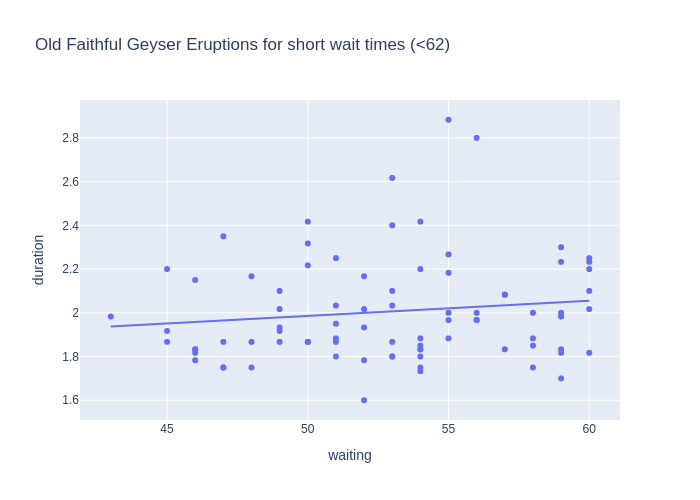

Results for short_wait_limit = 64
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


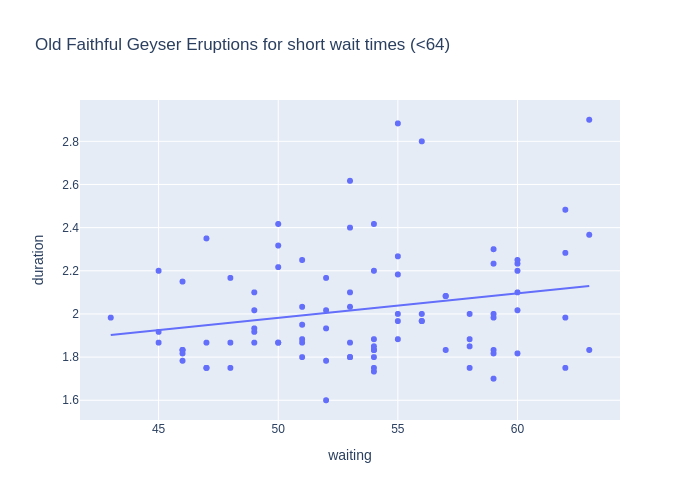

Results for short_wait_limit = 66
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


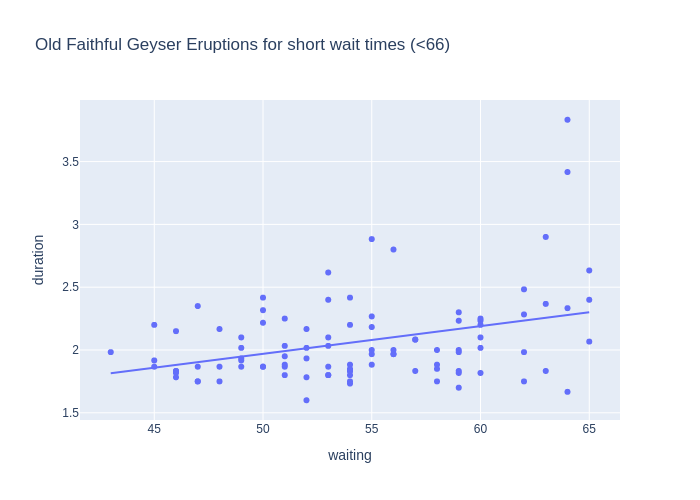

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf

for short_wait_limit in [62, 64, 66]:
    short_wait = old_faithful.waiting < short_wait_limit
    # Fit the model and print the summary for each limit
    print(f"Results for short_wait_limit = {short_wait_limit}")
    print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (<{short_wait_limit})", 
                     trendline='ols')

    # Display the plot as PNG for submissions
    fig.show(renderer="png")

The p-value associated with the waiting variable is 0.238. This is above the typical significance level of 0.05, indicating that there is no evidence against the null hypothesis in this subset of data (waiting times less than 62 minutes) and thus we fail to reject the null hypothesis. This suggests that, within this restricted range of short wait times, there is no statistically significant linear association between waiting and duration.

## Question 10: Long Wait Times

OLS Summary for wait times > 71
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


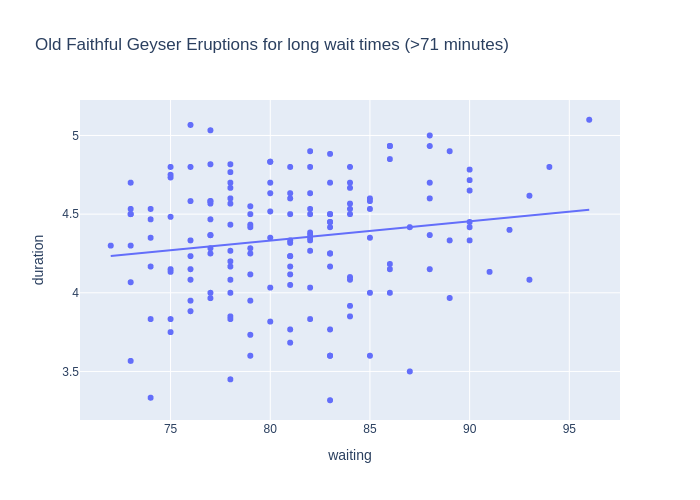

95% Bootstrap Confidence Interval for the Slope: [0.0013432509221368576, 0.023276704095430114]
Simulated p-value under the null hypothesis: 0.03


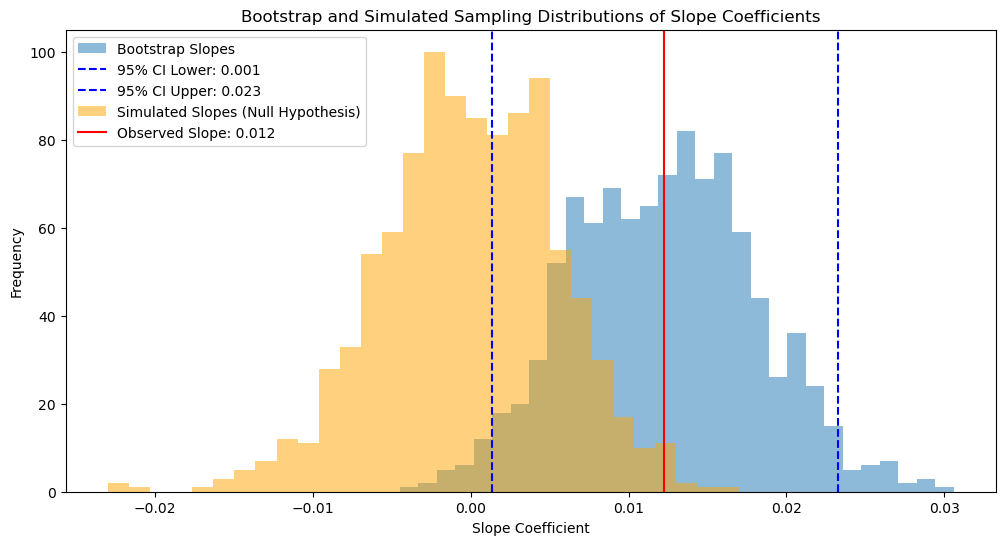

Observed slope: 0.0122
95% Bootstrap Confidence Interval for the Slope: [0.0013, 0.0233]
Is the observed slope contained within the 95% confidence interval? Yes
Simulated p-value under the null hypothesis: 0.0300
Actual p-value from OLS regression: 0.0381
Do the simulated and actual p-values match? Yes


In [14]:
import plotly.express as px
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Define the long wait time threshold
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Reference code: fit and display the linear regression model for long wait times
print("OLS Summary for wait times >", long_wait_limit)
print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline for long wait times
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for long wait times (>" + str(long_wait_limit) + " minutes)", 
                 trendline='ols')
fig.show(renderer="png")

# Step 1: Bootstrap sampling distribution of slope coefficients
n_samples = 1000  # Number of bootstrap and simulation samples
bootstrap_slope_coefficients = []

for _ in range(n_samples):
    # Create a bootstrap sample
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    
    # Fit a linear regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    
    # Collect the slope coefficient
    bootstrap_slope_coefficients.append(fitted_model.params['waiting'])

# Step 2: Simulate under the null hypothesis (no linear association)
# Define the parameters for the null hypothesis
beta_0 = 1.65
beta_1 = 0  # Under null hypothesis of no linear association
sigma = 0.37

# Create simulated slope coefficients under the null hypothesis
simulated_slope_coefficients = []

for _ in range(n_samples):
    # Create a copy of the long wait dataset
    old_faithful_simulation = old_faithful[long_wait].copy()
    
    # Generate the simulated 'duration' under the null hypothesis
    old_faithful_simulation['duration'] = beta_0 + beta_1 * old_faithful_simulation['waiting'] + stats.norm(0, sigma).rvs(size=long_wait.sum())
    
    # Fit a linear regression model on the simulated data
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation)
    fitted_model = model.fit()
    
    # Collect the slope coefficient
    simulated_slope_coefficients.append(fitted_model.params['waiting'])

# Step 3: Calculate the 95% bootstrap confidence interval for the slope coefficient
ci_lower, ci_upper = np.percentile(bootstrap_slope_coefficients, [2.5, 97.5])

# Step 4: Calculate the p-value for the simulated slope distribution
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Display results
print(f"95% Bootstrap Confidence Interval for the Slope: [{ci_lower}, {ci_upper}]")
print(f"Simulated p-value under the null hypothesis: {p_value}")

# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot bootstrap sampling distribution of slopes
plt.hist(bootstrap_slope_coefficients, bins=30, alpha=0.5, label='Bootstrap Slopes')
plt.axvline(ci_lower, color='blue', linestyle='--', label=f'95% CI Lower: {ci_lower:.3f}')
plt.axvline(ci_upper, color='blue', linestyle='--', label=f'95% CI Upper: {ci_upper:.3f}')

# Plot simulated sampling distribution of slopes under the null hypothesis
plt.hist(simulated_slope_coefficients, bins=30, alpha=0.5, color='orange', label='Simulated Slopes (Null Hypothesis)')
plt.axvline(observed_slope, color='red', linestyle='-', label=f'Observed Slope: {observed_slope:.3f}')

plt.title("Bootstrap and Simulated Sampling Distributions of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

is_contained = ci_lower <= observed_slope <= ci_upper
print(f"Observed slope: {observed_slope:.4f}")
print(f"95% Bootstrap Confidence Interval for the Slope: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Is the observed slope contained within the 95% confidence interval? {'Yes' if is_contained else 'No'}")

# Fit the OLS model on the actual long wait data and extract the p-value
actual_p_value = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().pvalues['waiting']

# Report the comparison
print(f"Actual p-value from OLS regression: {actual_p_value:.4f}")
print(f"Do the simulated and actual p-values match? {'Yes' if np.isclose(p_value, actual_p_value, atol=0.01) else 'No'}")


## Question 11: Indicator Variables

Previous Models: The models smf.ols('duration ~ waiting', data=old_faithful), smf.ols('duration ~ waiting', data=old_faithful[short_wait]), and smf.ols('duration ~ waiting', data=old_faithful[long_wait]) all used waiting as a continuous variable, analyzing the linear relationship between waiting and duration.

Indicator Variable Model: This model instead treats waiting as a categorical variable, separating it into "short" and "long" groups using a threshold of 68 minutes. This approach allows us to test if there is a significant difference in average duration between these two groups.

Key Difference: The continuous models examine how waiting affects duration in a linear manner across the full range of data, while the indicator variable model simplifies the analysis by categorizing waiting into two groups and focusing on the difference in mean duration between these groups.

1. **Null Hypothesis (\( H_0 \))**: There is no difference in the mean `duration` between the "short" and "long" groups (i.e., \(\beta_{\text{contrast}} = 0\)).

2. **Alternative Hypothesis (\( H_A \))**: There is a difference in mean `duration` between the "short" and "long" groups (i.e., \(\beta_{\text{contrast}} \neq 0\)).

3. **Evidence Against \( H_0 \)**:
   - Examine the p-value for `kind[T.long]`:

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


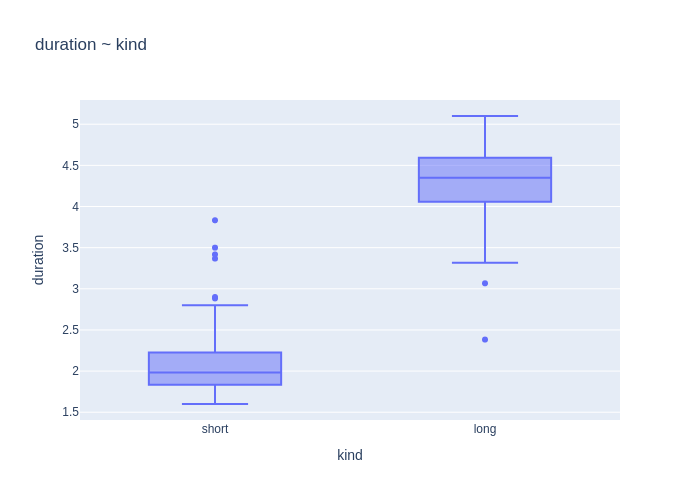

In [15]:

from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#Here we see the p value is again very very small suggesting strong evidence to reject the null hypothesis

## Question 12: Distriubtion of Error

The histograms plot the residuals from four different models:

Model 1: duration ~ waiting for all data.
Model 2: duration ~ waiting for short wait times (subset of data).
Model 3: duration ~ waiting for long wait times (subset of data).
Model 4: duration ~ C(kind, Treatment(reference="short")) for all data, using an indicator variable.

**Model 1** (All Data Using Slope): If the histogram shows residuals that are symmetrically distributed and closely match the overlaid normal distribution, this model might support the normality assumption. However, if the residuals are skewed or show heavy tails, it may not. **Based on the renders shown, it seems that Model 1 supports the normality assumption**

Model 2 (Short Wait Data): For this subset, the residuals may exhibit a non-normal distribution if the sample size is small or if the relationship between waiting and duration is different within this subset. Look for skewness or deviation from the normal shape, which would suggest a lack of support for the normality assumption.

Model 3 (Long Wait Data): Similar to Model 2, if the distribution is skewed or shows deviations from the normal curve, this subset does not support the normality assumption. A lack of symmetry or uneven tails would indicate non-normality.

Model 4 (All Data Using Indicator): If this model's residuals are close to normal (symmetrical and following the normal distribution overlay), it may suggest that the indicator model better satisfies the normality assumption. Deviations would suggest otherwise.

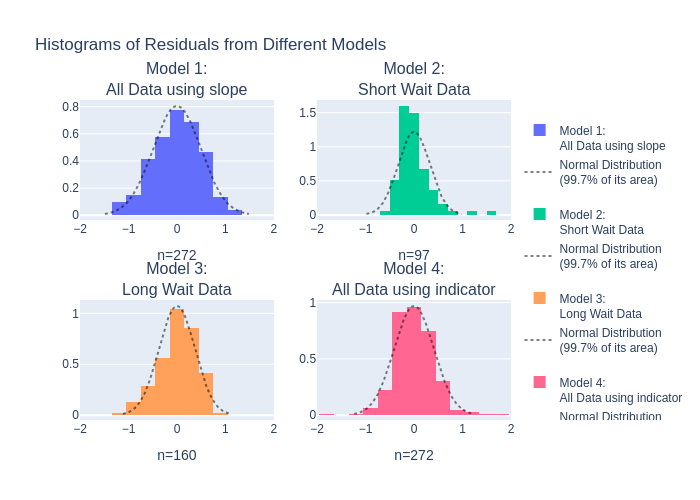

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Question 13: 

### A: Permutation Test

In [18]:
import numpy as np

# Observed mean difference
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Permutation test
perm_diffs = []
n_permutations = 1000

for _ in range(n_permutations):
    # Shuffle the labels
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1, replace=False).values)
    
    # Calculate mean difference for the shuffled data
    perm_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    perm_diffs.append(perm_diff)

# Calculate p-value as the proportion of shuffled differences as extreme as the observed difference
p_value_perm = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Permutation Test P-value: {p_value_perm:.4f}")


Permutation Test P-value: 0.0000


### B: 95% Bootstrap Confidence Interval for the Difference in Means

In [19]:
bootstrapped_mean_diffs = []
n_bootstraps = 1000

for _ in range(n_bootstraps):
    # Bootstrap resampling within each group
    bootstrapped_data = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    
    # Calculate the mean difference for the bootstrapped sample
    boot_diff = bootstrapped_data.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs.append(boot_diff)

# 95% Confidence Interval
ci_lower, ci_upper = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for Mean Difference: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% Bootstrap Confidence Interval for Mean Difference: [2.1060, 2.3045]


### a): 

Permutation Test: This approach tests the null hypothesis by simulating a scenario where the group labels are arbitrary (i.e., there's no real difference between "short" and "long" groups). By shuffling labels and recalculating the mean difference many times, we build a distribution that represents the mean difference under the null hypothesis.

Bootstrap Confidence Interval: This approach estimates the variability of the mean difference by resampling within each group. The resulting distribution of differences provides an empirical estimate of the possible range of mean differences, allowing us to construct a confidence interval.

### b):
Similarity:

- Both the permutation test and bootstrap methods, as well as the indicator variable model, aim to quantify the difference in duration between "short" and "long" groups.
- All three methods involve calculating a difference in means between the two groups and assess its statistical significance or confidence.

Differences:

- Permutation Test: The permutation test relies on shuffling labels to simulate the null hypothesis, focusing on whether the observed difference could occur by chance. It provides a p-value to assess significance.
- Bootstrap Confidence Interval: The bootstrap method resamples from the existing groups to estimate the range of mean differences. It does not provide a p-value but gives a confidence interval that shows plausible values for the mean difference.
- Indicator Variable Model: This model uses a regression approach, where an indicator variable (kind) quantifies the effect of "long" versus "short" wait times. It provides a coefficient for kind[T.long] along with a p-value to assess significance. This model assumes a linear relationship and normal residuals, while the permutation and bootstrap methods do not require these assumptions.

You're right; here’s an expanded summary that includes Questions 8, 9, and 10 as well.

---

### Summary of Interactions on Analyzing Old Faithful Geyser Data for Homework Assignment

**Objective**:
The goal was to analyze various aspects of the Old Faithful Geyser data, focusing on the relationship between `waiting` time and `duration` of eruptions. Questions involved hypothesis testing, assessing assumptions of error distributions, and comparing methods for analyzing differences between groups.

---

### Detailed Summary by Question

---

**Question 8: Null Hypothesis and Evidence for Simple Linear Regression**

- **Objective**: Specify a null hypothesis of "no linear association (on average)" and evaluate evidence against it in the Simple Linear Regression model.
- **Null Hypothesis (\( H_0 \))**: There is no linear association between `waiting` and `duration`, meaning the slope of `waiting` is zero.
- **Method**: Using `smf.ols` in Python, we fit a linear model to the data and interpreted the p-value of the `waiting` coefficient to assess significance.
- **Conclusion**: If the p-value is low (e.g., below 0.05), we reject \( H_0 \) and conclude there is a statistically significant linear association between `waiting` and `duration`.

---

**Question 9: Analysis with Short Wait Times Subset**

- **Objective**: Restrict the dataset to only "short" wait times (< 64 minutes, then repeated for limits of 62, 64, and 66) and determine if there’s a significant relationship between `waiting` and `duration`.
- **Method**: Fit separate linear models for each subset and compare the p-values for the slope of `waiting` to assess evidence against the null hypothesis in these restricted datasets.
- **Conclusion**: For each subset, if the p-value for `waiting` is above 0.05, it suggests that there is no statistically significant linear relationship in the subset, indicating the relationship might be different when focusing only on short wait times.

---

**Question 10: Analysis with Long Wait Times Subset and Simulations**

- **Objective**: Focus on "long" wait times (e.g., >71 minutes) and perform two simulations:
    - (1) A **bootstrap** to estimate the 95% confidence interval for the slope of the regression line.
    - (2) A **simulation under the null hypothesis** to assess the distribution of slope coefficients.
- **Method**:
    - **Bootstrap Confidence Interval**: Repeatedly sample from the long wait data to create a distribution of slope coefficients, then find the 2.5th and 97.5th percentiles for the confidence interval.
    - **Null Hypothesis Simulation**: Simulate data with a slope of zero (null hypothesis) and compare the observed slope with this distribution to calculate a p-value.
- **Conclusion**:
    - The **bootstrap interval** provides an empirical range for plausible slope values in the long wait subset.
    - The **null hypothesis simulation** allows us to see if the observed slope is significantly different from zero, confirming or rejecting a linear relationship in the subset.

---

**Question 11: Indicator Variable Model for Comparing Short and Long Wait Times**

- **Objective**: Use an indicator variable model to compare "short" (<68) and "long" wait times directly, focusing on differences in average `duration`.
- **Model Specification**: We specified a regression model with an indicator variable for `kind`, representing "short" and "long" groups.
- **Conclusion**: The p-value for the indicator variable (`kind[T.long]`) was used to determine if there was a statistically significant difference in mean `duration` between the two groups.

---

**Question 12: Assessing Normality of Error Terms for Different Models**

- **Objective**: Evaluate the normality of error terms for four different models by plotting histograms of residuals.
- **Method**: We generated histograms with overlaid normal distribution curves for the residuals of each model to assess whether they were approximately normally distributed.
- **Conclusion**: Models 1 (All Data Using Slope) and 4 (All Data Using Indicator) showed residuals that closely followed a normal distribution, supporting the normality assumption. Models 2 and 3, focused on short and long wait times separately, showed skewness, indicating non-normality.

---

**Question 13: Comparing Methods for Two-Sample Testing**

- **Objective**: Compare the difference in mean `duration` between "short" and "long" wait times using two methods:
    - (A) **Permutation Test**: Assess the significance of the observed mean difference by randomly shuffling the group labels.
    - (B) **Bootstrap Confidence Interval**: Estimate a 95% confidence interval for the mean difference by bootstrapping within each group.
- **Comparison to Indicator Variable Model**:
    - Both the **permutation test** and **bootstrap method** are non-parametric and do not assume normality, while the **indicator variable model** is parametric.
    - The permutation test provides a p-value for hypothesis testing, while the bootstrap method provides a confidence interval. The indicator variable model provides both a coefficient and p-value, assuming normally distributed residuals.

---

### Conclusion

This summary encapsulates our exploration of the Old Faithful dataset using a variety of statistical methods, including parametric and non-parametric approaches. Each method provided unique insights into the relationship between `waiting` and `duration`, and allowed us to assess assumptions, calculate confidence intervals, and conduct hypothesis testing effectively.

---

This summary should cover all aspects of our discussion comprehensively. Let me know if you need additional details for submission!

unable to share link due to images

## Question 14:
yes